![Logo TUBAF](https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png)

Exercise material of the MSc-level course **Soil Dynamics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics


# Pfahl unter zyklischer Last


Module laden

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact
from sympy.interactive import printing
import plot_functions.plot_settings
%run plot_functions/wave1d_pile_interaction.ipynb
printing.init_printing()
%load_ext ipydex.displaytools

_Last line enables special comment **##:** for LaTeX formatting of output_ 

## Stationärer Zustand

![wavebar_pile.png](https://github.com/nagelt/soil_dynamics/raw/master/Images/wavebar_pile.png)

Variablen für symbolische Rechnung deklarieren (sympy)

In [2]:
A, rho, E, kappa, omega, z, t, C1, C2, L, F, H = sp.symbols('A rho E kappa omega z t C1 C2 L F H')

Hilfsfunktion um die Koeffizienten ($C_1$, $C_2$) aus den Randbedingungen (Kraftverlauf oben, unverschieblich unten) zu bestimmen

In [3]:
def solveBC(f):
    dfdz = f.diff(z)
    BCtop = dfdz.subs(z, 0) + F/(E*A)
    BCbottom = f.subs(z, L) 
    BCsol = sp.solve([BCtop, BCbottom], C1, C2)
    return BCsol    

Aus dem Ansatz $w(z,t)=f(z)sin(\omega t)$ folgt für $f(z)$ in einem Fall der Diskriminante

In [4]:
alpha = sp.sqrt(1-(kappa*H)**2)
fa = C1*sp.cosh(alpha*z/H) + C2*sp.sinh(alpha*z/H)   # hyperbolic functions

Die unbestimmten Koeffizienten $C_1$ und $C_2$ folgen aus den Randbedingungen

In [5]:
BCsol_a = solveBC(fa)

Einsetzen in den ursprünglichen Ansatz

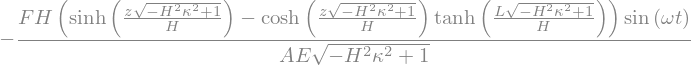

In [6]:
fasol = fa.subs([(C1, BCsol_a[C1]), (C2, BCsol_a[C2])])
wasol = sp.simplify(fasol*sp.sin(omega*t))
display(wasol)
#print(wasol)   # for safety if display fails

Jetzt noch mal das gleiche für den anderen Fall der Diskriminante um reell zu bleiben (*alternativ total komplex*)

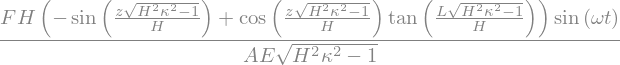

In [7]:
beta = sp.sqrt(-1+(kappa*H)**2)
fb = C1*sp.cos(beta*z/H) + C2*sp.sin(beta*z/H)    # trigonometric functions
BCsol_b = solveBC(fb)
fbsol = fb.subs([(C1, BCsol_b[C1]), (C2, BCsol_b[C2])])
wbsol = sp.simplify(fbsol*sp.sin(omega*t))
display(wbsol)
#print(wbsol)   # for safety if display fails

In [8]:
interactive_pile_plot()   

interactive(children=(IntSlider(value=5, description='$f$ [Hz]:', max=101, min=1, step=5), IntSlider(value=101…

Wie ändert sich die Eigenfrequenz des Einmassenschwingers, wenn sich die Steifkeit erhöht (hohe Steifigkeit entspricht kurzer Bezugslänge $H$)? Vergleichen Sie diese Tendenz mit dem Einmassenschwinger.

Für große Bezugslängen nähert sich die Eigenfrequenz der des elastischen Stabs ohne äußere, verteilte Steifigkeit. Berechnen Sie die Periodendauer einer Eigenschwingung für geringe äußere Steifigkeit (großes $H$) und vergleichen Sie sie mit der Zeit, die eine Welle der Geschwindigkeit $c$ braucht um den Weg einer Pfahllänge ($L$) zurückzulegen.